In [16]:
import os
import cv2
import winsound
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates

In [17]:
#set the proper start time for your video files. Also set the directory containing the video files
videoStartDate = dt.datetime(year = 2018, month = 10, day = 17, hour=22, minute=52, second=39)
vidDirectory = r"C:\Users\Glow-PC\Documents\OpenCV Sleep\20181017"
#get a list of all files and then trim that list down to mp4 files. the default naming scheme from iSpy keeps things in chronological order
fileList = os.listdir(vidDirectory)
videoList = []
for f in fileList:
	if f.endswith('.mp4'):	
		videoList += [f]

In [19]:
#these 4 numbers define the region of interest for my legs. Make sure it captures from the knees down to below the feet.
nickMaskX1 = 50
nickMaskX2 = 250
nickMaskY1 = 200
nickMaskY2 = 420

#choose a random video file (15th in this case) so that we can fine tune the region of interest above. hit escape to leave vid
vid = videoList[15]   
vidCap = cv2.VideoCapture(vid)  


while(True):
    ret, frame = vidCap.read()
    if not ret:
        break

    cv2.rectangle(frame,(nickMaskX1,nickMaskY1),(nickMaskX2,nickMaskY2),(0,0,255),15)
    cv2.imshow('frame1',frame)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

vidCap.release()
cv2.destroyAllWindows()

In [20]:
#now that we have defined the ROI we step through the video files in order and extract "activity data"
#calculate the average "activity" in a given second and then save the data point.
#we use the background subtract feature in openCV that can be used to highlight motion in a video feed
#the value we care about is just the sum of the mask in the ROI. high value = lots of pixels have changed
#every video file (in my case 15 min video files) gets its own output txt file that is simply a 1D list of activity values for every second
for vid in videoList:
    
    listString = list(vid)
    listString = listString[:-4]
    listString = listString + list("IndivAct") + list(".txt")
    newExtension = ''.join(listString)
    activityFile = open(newExtension,"w+")
    
    cap = cv2.VideoCapture(vid)
    fgbg = cv2.createBackgroundSubtractorMOG2()
    
    prevMilliTimer = 0
    nickRunningSum = 0 
    meanIndex = 0

    while(True):
        ret, frame = cap.read()
        if not ret:
            break

        fgmask = fgbg.apply(frame)

    #check ms of video, collect data for 1s and once you roll over into the next second save the data and reset variables    
        currentMilliTimer = cap.get(cv2.CAP_PROP_POS_MSEC) % 1000

        if currentMilliTimer < prevMilliTimer: #if true then we rolled into the next second
            activityFile.write(str(nickRunningSum / meanIndex)) #my activity
            activityFile.write("\r")
            nickRunningSum = 0
            meanIndex = 0

        nickRunningSum += np.sum(fgmask[nickMaskY1:nickMaskY2,nickMaskX1:nickMaskX2]) #keep a running sum of the nick activity that we'll average every 1s
        meanIndex += 1 #this var will divide to make mean
        prevMilliTimer = currentMilliTimer
        
    print(vid)
    cap.release()
    cv2.destroyAllWindows()
        
    activityFile.close()

#this is just so I get a system beep once completed
frequency = 1000  # Set Frequency To 2500 Hertz
duration = 250  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

1_2018-10-17_22-52-39.mp4
1_2018-10-17_23-07-40.mp4
1_2018-10-17_23-22-42.mp4
1_2018-10-17_23-37-45.mp4
1_2018-10-17_23-52-46.mp4
1_2018-10-18_00-07-48.mp4
1_2018-10-18_00-22-49.mp4
1_2018-10-18_00-37-51.mp4
1_2018-10-18_00-52-53.mp4
1_2018-10-18_01-07-55.mp4
1_2018-10-18_01-22-56.mp4
1_2018-10-18_01-37-58.mp4
1_2018-10-18_01-53-00.mp4
1_2018-10-18_02-08-01.mp4
1_2018-10-18_02-23-03.mp4
1_2018-10-18_02-38-05.mp4
1_2018-10-18_02-53-06.mp4
1_2018-10-18_03-08-08.mp4
1_2018-10-18_03-23-09.mp4
1_2018-10-18_03-38-11.mp4
1_2018-10-18_03-53-13.mp4
1_2018-10-18_04-08-15.mp4
1_2018-10-18_04-23-16.mp4
1_2018-10-18_04-38-18.mp4
1_2018-10-18_04-53-20.mp4
1_2018-10-18_05-08-22.mp4
1_2018-10-18_05-23-24.mp4
1_2018-10-18_05-38-25.mp4
1_2018-10-18_05-53-26.mp4


In [21]:
#make a list of the txt activity files that we generated above, then import it into 1 array
fileList = os.listdir(vidDirectory)
dataFileList = []
for f in fileList:
    if f.endswith('IndivAct.txt'):
        dataFileList += [f]
        
with open(dataFileList[0], 'rU') as dataFileObj:
    dataList = [1] #put a dummy value here and drop it later
    for line in dataFileObj:
        lineArray = int(float(line))
        dataList = np.append(dataList,lineArray)
    dataList = dataList[1:]
for x in range(1,len(dataFileList)):
    with open(dataFileList[x], 'rU') as dataFileObj:
        for line in dataFileObj:
            lineArray = int(float(line))
            dataList = np.append(dataList,lineArray)
#our activity data files were 1D arrays of our Y-value, here we generate our 1D array of X-values (time)            
timeArray = [videoStartDate + dt.timedelta(seconds = i) for i in range(len(dataList))]
quarterHourTimeArray = [videoStartDate + dt.timedelta(minutes = 7.5+15*i) for i in range(round(len(dataList)/900))]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 'U' mode is deprecated
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 'U' mode is deprecated
  


In [22]:
#threshold/binarize the data. 1E6 worked really well for all of my work.
#any time that is >threshold gets accumulated in an array
eventData = []
threshold = 1E6
for x in range(0,len(dataList)):
    if dataList[x] > threshold:
        eventData = np.append(eventData,timeArray[x])

In [23]:
#now we have a long list of time values, but multiple sequential time values are really just one kick or movement
#so lets condense that array down to an array of "events"
#we're looking for rising edges and falling edges of our digital/binarized data
#the >2 part below basically says if two events are within 2 seconds of each other, ID them as 1 event
#in the end the eventList array is a 1D list of start and end times of the events we have identified
#example: eventData may contain a series [3,4,5,10,11,12] 
#which then gets ID's as two events and would have eventList=[3,5,10,12]

midEventFlag = False
eventList = []
for x in range(0,len(eventData)-1):
    if not midEventFlag:
        eventList = np.append(eventList,eventData[x])
        midEventFlag = not midEventFlag
    else:
        if (eventData[x + 1] - eventData[x]).total_seconds() > 2:
            eventList = np.append(eventList,eventData[x])
            midEventFlag = not midEventFlag

In [24]:
#now take our eventList and figure out 1) how long the event lasted and 2) what time was the event (the middle of the event)
eventTime = []
eventDuration = [] 
for x in range(0,len(eventList)-1,2):
    eventMidTime = eventList[x]+dt.timedelta(seconds = int((eventList[x+1]-eventList[x]).total_seconds()/2))
    eventTime = np.append(eventTime, eventMidTime)
    eventDuration = np.append(eventDuration, eventList[x+1]-eventList[x])

In [25]:
#now tally up the # of events we find in a 15 minute block
histoList = []
for x in range(0,len(quarterHourTimeArray)):
    histoList = np.append(histoList, len([element for element in eventTime if element>videoStartDate + dt.timedelta(minutes = 15*x) and element<videoStartDate + dt.timedelta(minutes = 15*(x+1))]))

102


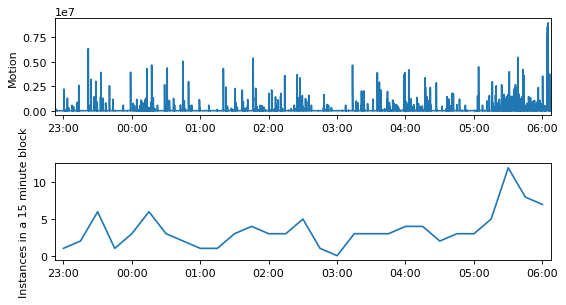

In [26]:
myFmt = mdates.DateFormatter('%H:%M')
fig = plt.figure(num=0, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(212)
ax2 = fig.add_subplot(211)

ax1.plot(quarterHourTimeArray,histoList)
ax1.set_ylabel('Instances in a 15 minute block')
ax1.xaxis.set_major_formatter(myFmt)
ax1.set_xlim([timeArray[0],timeArray[-1]])


ax2.plot(timeArray,dataList)
ax2.set_ylabel('Motion')
ax2.xaxis.set_major_formatter(myFmt)
ax2.set_xlim([timeArray[0],timeArray[-1]])

fig.subplots_adjust(wspace=0, hspace=0.5)

#the print below is the total # of kicks/events in the night
print(len(eventTime))

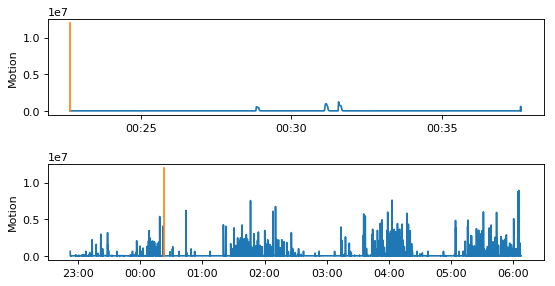

In [14]:
#this section is to generate a compilation video of events through the night with a corresponding activity plot
#this part is unnecessary most of the time but was important while initally understanding the data
#secondsIn and videoIndex pick a random video and a time within that video to make sure our plots are coming out right
myFmt = mdates.DateFormatter('%H:%M')
secondsIn=5400
videoIndex=6
lineTime= timeArray[0] + dt.timedelta(seconds = secondsIn)

fig = plt.figure(num=0, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(timeArray[videoIndex*900:(videoIndex+1)*900],dataList[videoIndex*900:(videoIndex+1)*900])
ax1.plot([lineTime,lineTime],[0,1.2E7])
ax1.set_ylabel('Motion')
ax1.xaxis.set_major_formatter(myFmt)

ax2.plot(timeArray,dataList)
ax2.plot([lineTime,lineTime],[0,1.2E7])
ax2.set_ylabel('Motion')
ax2.xaxis.set_major_formatter(myFmt)

fig.subplots_adjust(wspace=0, hspace=0.5)

def refreshPlots(videoIndex, secondsIn):
    ax1.cla()
    ax2.cla()
    
    lineTime= videoStartDate + dt.timedelta(seconds = secondsIn)
    
    ax1.plot(timeArray[videoIndex*900:(videoIndex+1)*900],dataList[videoIndex*900:(videoIndex+1)*900])
    ax1.plot([lineTime,lineTime],[0,1.2E7])
    ax1.set_ylabel('Motion')
    ax1.xaxis.set_major_formatter(myFmt)

    ax2.plot(timeArray,dataList)
    ax2.plot([lineTime,lineTime],[0,1.2E7])
    ax2.set_ylabel('Motion')
    ax2.xaxis.set_major_formatter(myFmt)

In [15]:
#now we start a new video file and go through the same process as above but instead of outputting activity txt files
#we output any frame above the threshold to video and also stitch an activity plot below the video. ned result is a compilation
fullFrameHeight = 380+4*80
fullFrameWidth = 640
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('nickCompWithPlot.avi',fourcc, 10.0, (fullFrameWidth,fullFrameHeight))
fullFrameArray = np.zeros((fullFrameHeight,fullFrameWidth,3),np.uint8)

for videoIndex in range(0,len(videoList)):
    vid = videoList[videoIndex]

    cap = cv2.VideoCapture(vid)
    fgbg = cv2.createBackgroundSubtractorMOG2()
    while(True):
        ret, frame = cap.read()
        if not ret:
            break

        fgmask = fgbg.apply(frame)

        if np.sum(fgmask[nickMaskY1:nickMaskY2,nickMaskX1:nickMaskX2]) > threshold:
            secondsIn = int(cap.get(cv2.CAP_PROP_POS_MSEC) / 1000) + videoIndex*900
            refreshPlots(videoIndex, secondsIn)
            fig.canvas.draw()
            figImgData = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
            figImgData = figImgData.reshape(fig.canvas.get_width_height()[::-1] + (3,))

            fullFrameArray[0:380,0:fullFrameWidth] = frame[0:380,0:fullFrameWidth]
            fullFrameArray[380:fullFrameHeight,0:fullFrameWidth] = figImgData
            out.write(fullFrameArray)

    cap.release()
    print(vid)

out.release()

frequency = 1000  # Set Frequency To 2500 Hertz
duration = 250  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


1_2018-10-17_22-52-39.mp4
1_2018-10-17_23-07-40.mp4
1_2018-10-17_23-22-42.mp4
1_2018-10-17_23-37-45.mp4
1_2018-10-17_23-52-46.mp4
1_2018-10-18_00-07-48.mp4
1_2018-10-18_00-22-49.mp4
1_2018-10-18_00-37-51.mp4
1_2018-10-18_00-52-53.mp4
1_2018-10-18_01-07-55.mp4
1_2018-10-18_01-22-56.mp4
1_2018-10-18_01-37-58.mp4
1_2018-10-18_01-53-00.mp4
1_2018-10-18_02-08-01.mp4
1_2018-10-18_02-23-03.mp4
1_2018-10-18_02-38-05.mp4
1_2018-10-18_02-53-06.mp4
1_2018-10-18_03-08-08.mp4
1_2018-10-18_03-23-09.mp4
1_2018-10-18_03-38-11.mp4
1_2018-10-18_03-53-13.mp4
1_2018-10-18_04-08-15.mp4
1_2018-10-18_04-23-16.mp4
1_2018-10-18_04-38-18.mp4
1_2018-10-18_04-53-20.mp4
1_2018-10-18_05-08-22.mp4
1_2018-10-18_05-23-24.mp4
1_2018-10-18_05-38-25.mp4
1_2018-10-18_05-53-26.mp4
